In [1]:
model_type = "model_log_reg"

In [2]:
import sys
sys.path.append(rf'Classification\titanic\{model_type}')

In [3]:
import pandas as pd
import yaml
import os
import pickle
import matplotlib.pyplot as plt
import dalex
from sklearn.inspection import PartialDependenceDisplay
import shap

In [4]:
yaml_path = rf"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\{model_type}\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

# Params

In [5]:
X_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['X_val'])   
    
y_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['y_val'])


X_train_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['X_train'])   
    
y_train_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['y_train'])
    
params_ = {
        'X_train_feat_sel': X_train_feat_sel,
        'y_train_feat_sel': y_train_feat_sel,
        'X_val_feat_sel': X_val_feat_sel,
        'y_val_feat_sel': y_val_feat_sel,
        'model': config['model']['path'],
        'save_plot': config['save_reports']['path_plot'],
        'removed_cols': config['save_reports']['path_reports'],
        }

# Read Train / val dataset

In [6]:
X_train = pd.read_parquet(params_['X_train_feat_sel'])
y_train = pd.read_parquet(params_['y_train_feat_sel'])   

X_val = pd.read_parquet(params_['X_val_feat_sel'])
y_val = pd.read_parquet(params_['y_val_feat_sel'])    

In [7]:
model_path = os.path.join(
        config['init_path'],
        params_['model'],
        f"model_{config['model']['model_version']}.pkl")    
with open(model_path, "rb") as file:
            model = pickle.load(file)

# Drop columns

In [8]:
X_train.drop(
    columns=config['model_selection']['cols_2_drop'], 
    inplace=True)

X_val.drop(
    columns=config['model_selection']['cols_2_drop'], 
    inplace=True)


# Partial dependence plot

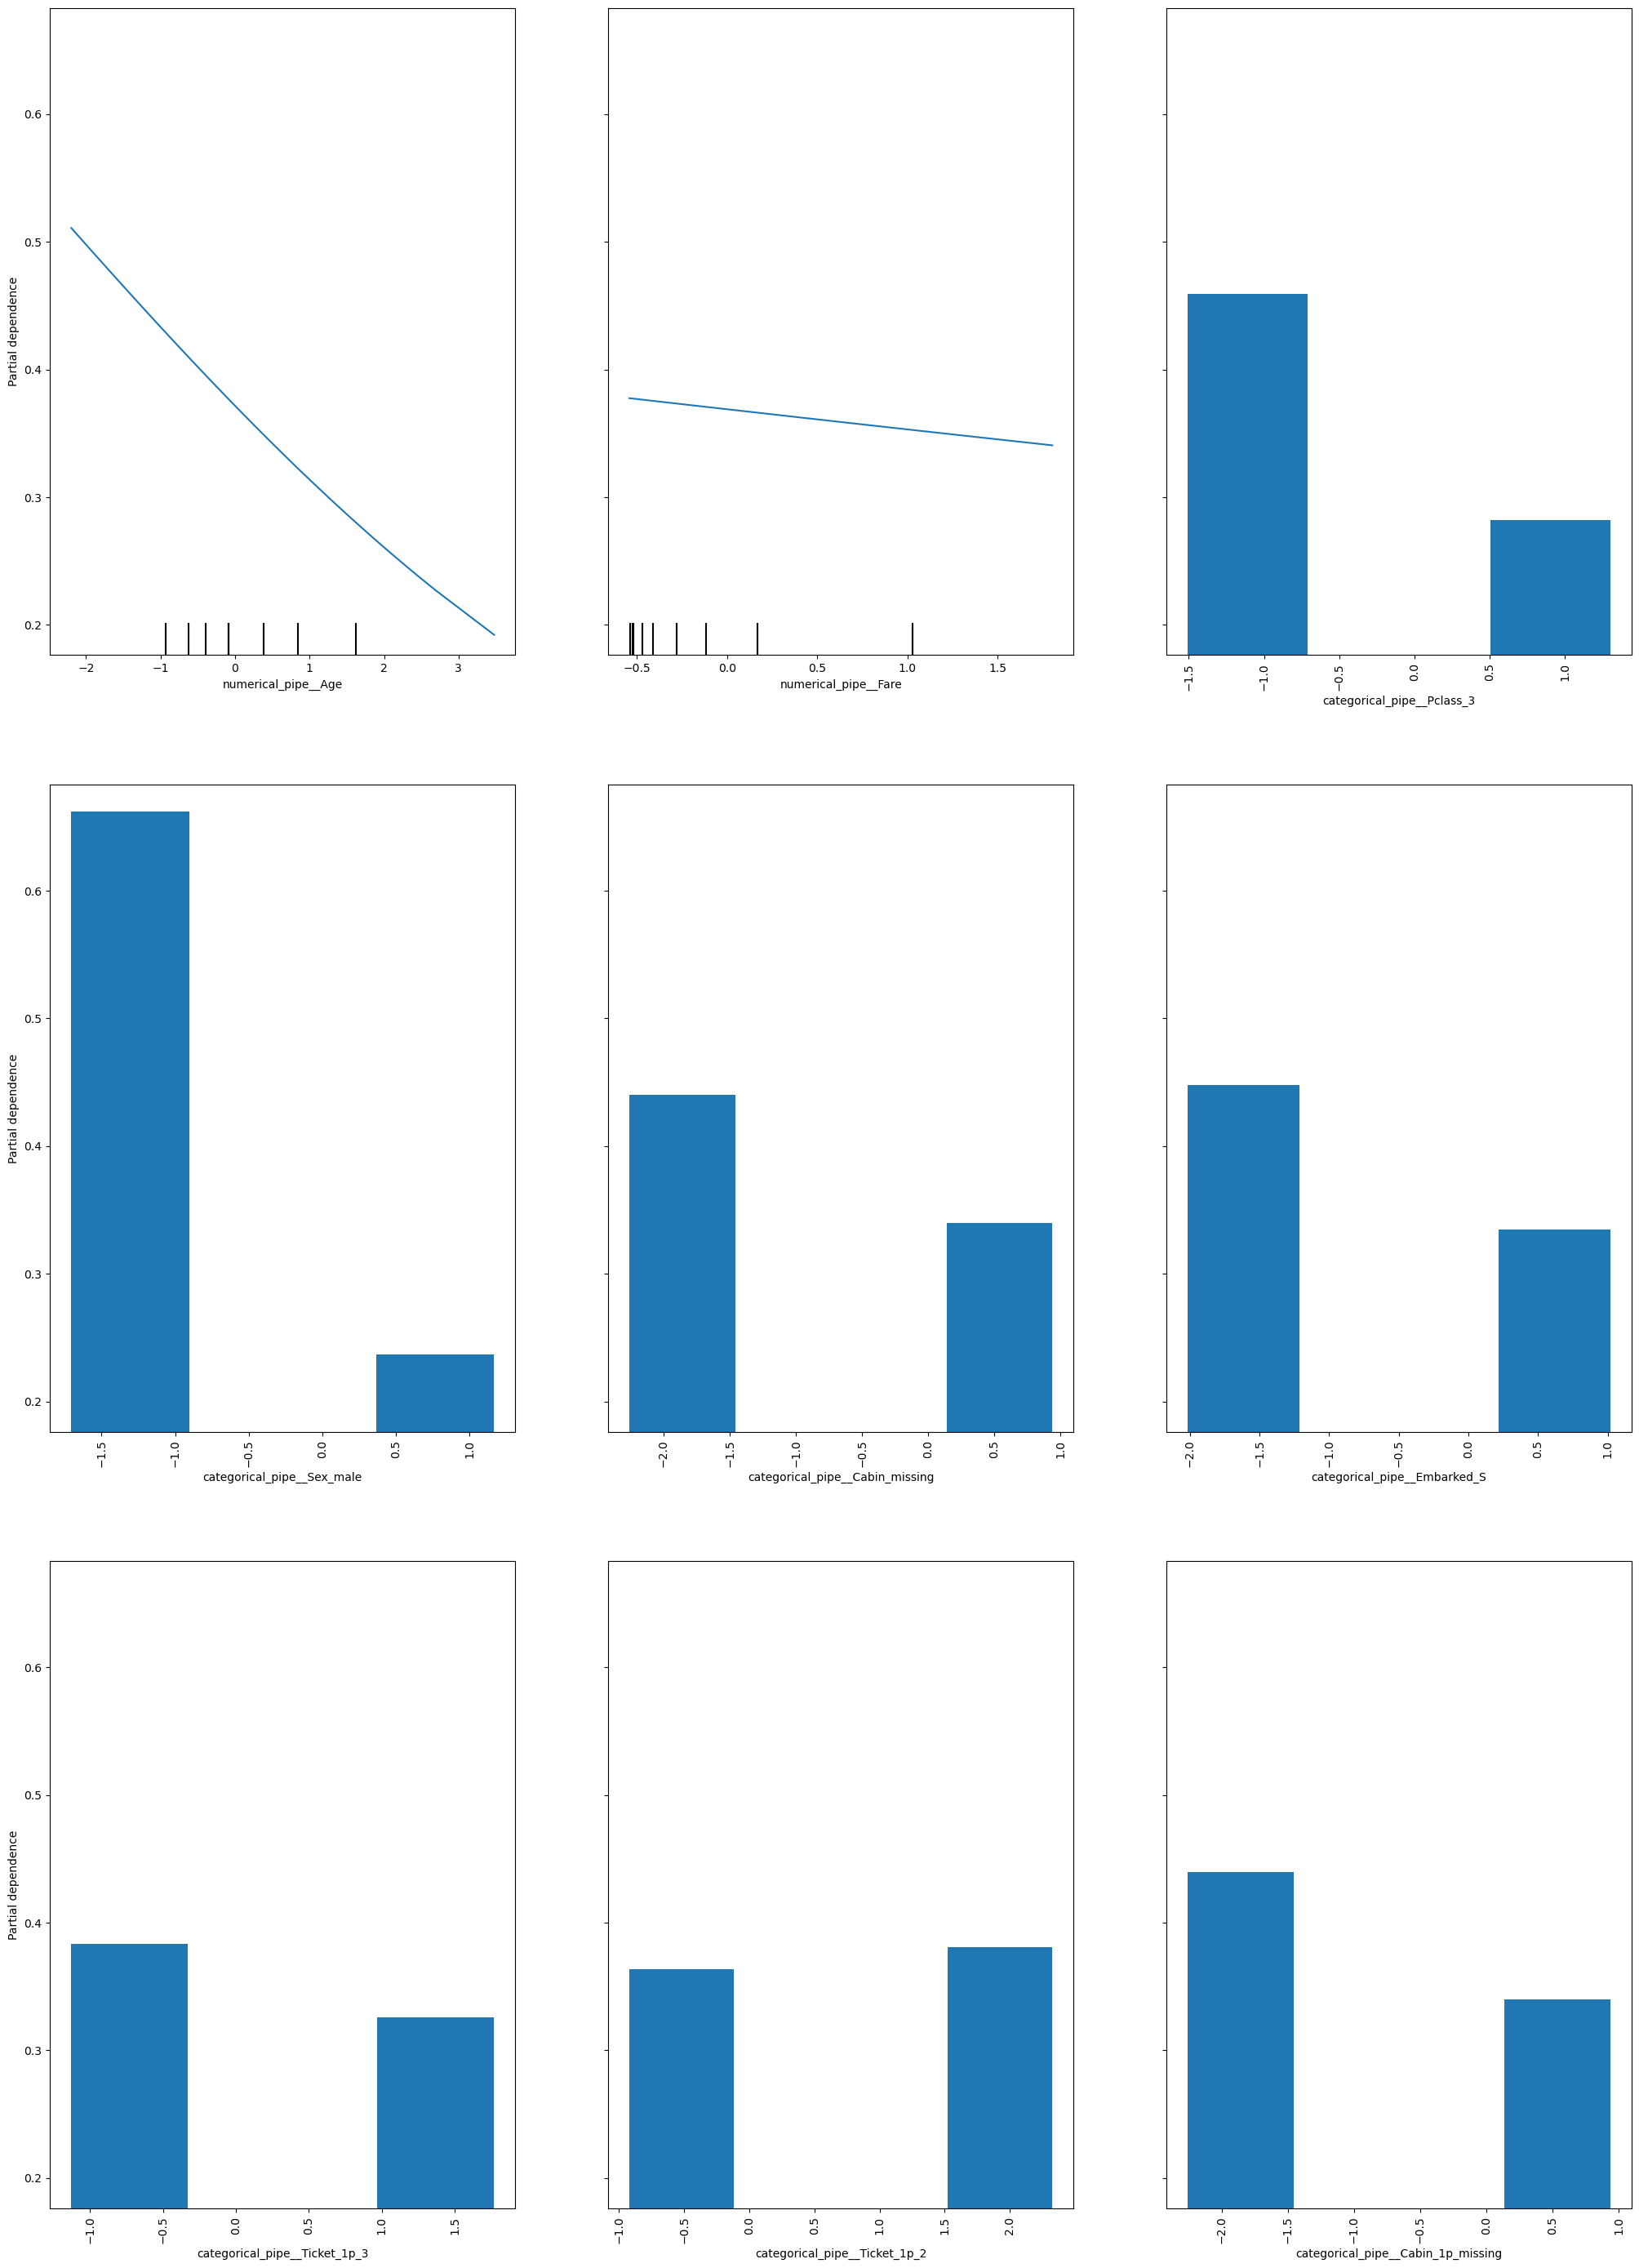

In [9]:
fig, ax = plt.subplots(figsize=(25, 35))
PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_val,
        features = X_val.columns.tolist(),
        categorical_features=X_val.columns[X_val.columns.str.contains('categorical_pipe')],
        random_state=23,
        ax=ax

    )

# Shap Values

In [10]:
X_val_proba = model.predict_proba(X_val)

In [11]:
explainer = shap.Explainer(model.predict_proba, X_train)

In [12]:
shap_values_train = explainer(X_train)
shap_values_val = explainer(X_val)

ExactExplainer explainer: 669it [00:10,  1.44s/it]                 


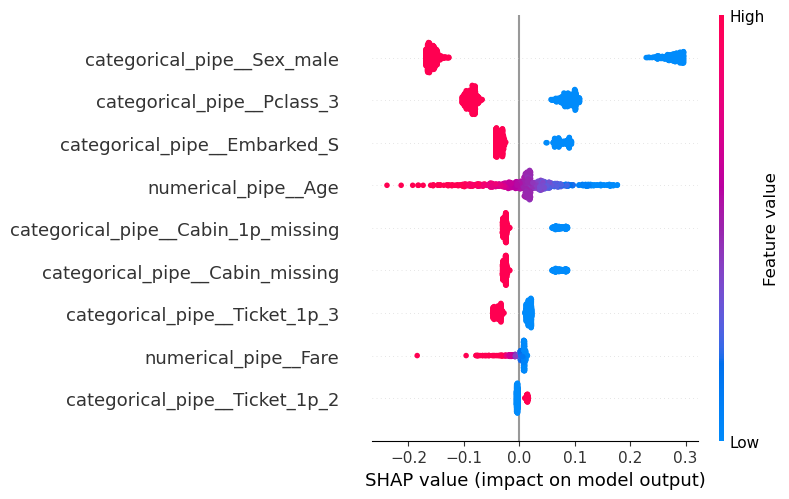

In [13]:
# Classe positiva (geralmente índice 1)
shap.summary_plot(
    shap_values_train.values[:, :, 1],
    X_train
)

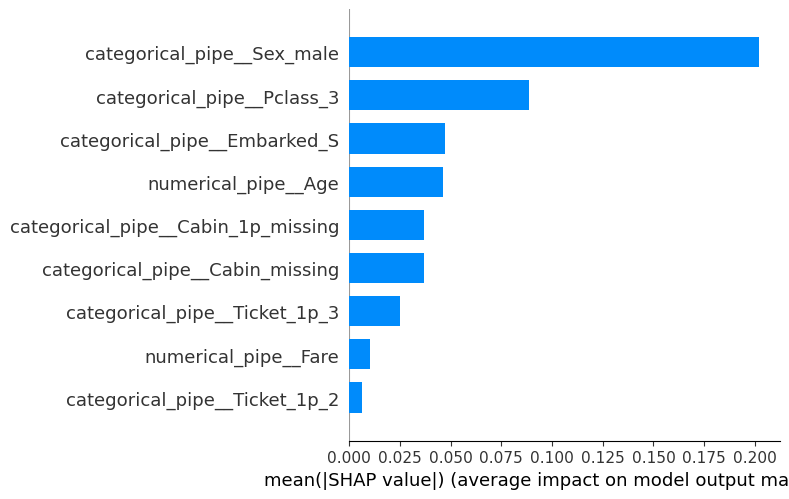

In [14]:
shap.summary_plot(
    shap_values_train.values[:, :, 1],
    X_train,
    plot_type="bar"
)


In [16]:
X_val.loc[727]

numerical_pipe__Age                  -0.082329
numerical_pipe__Fare                 -0.524185
categorical_pipe__Pclass_3            0.902894
categorical_pipe__Sex_male           -1.305547
categorical_pipe__Cabin_missing       0.538122
categorical_pipe__Embarked_S         -1.615800
categorical_pipe__Ticket_1p_3         1.370879
categorical_pipe__Ticket_1p_2        -0.519579
categorical_pipe__Cabin_1p_missing    0.538122
Name: 727, dtype: float64

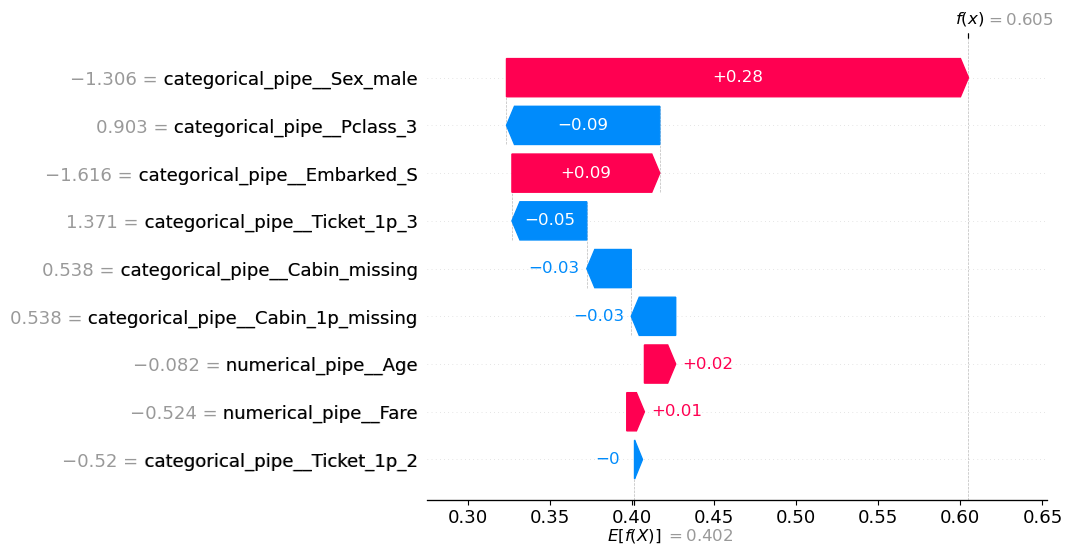

In [18]:
shap.plots.waterfall(shap_values_val[0,:,1])

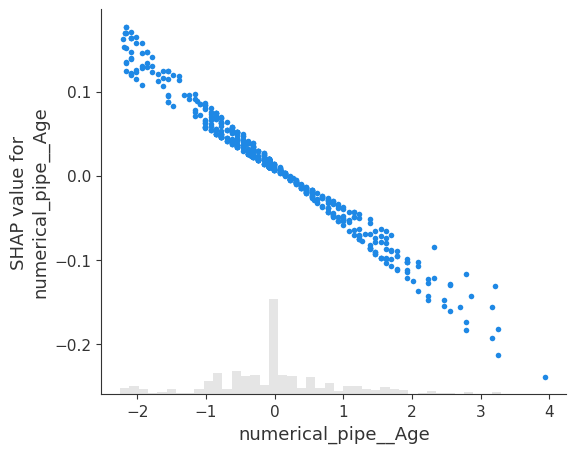

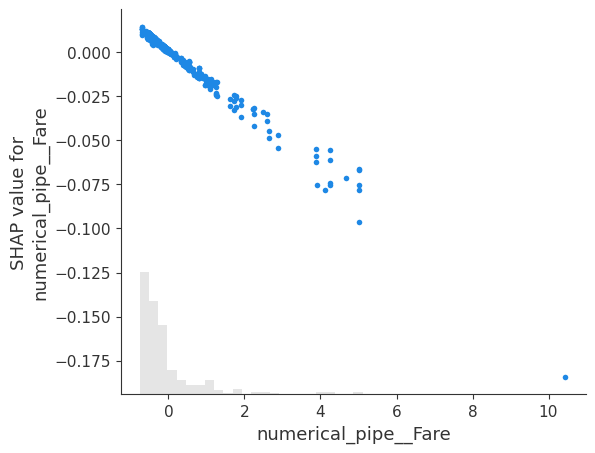

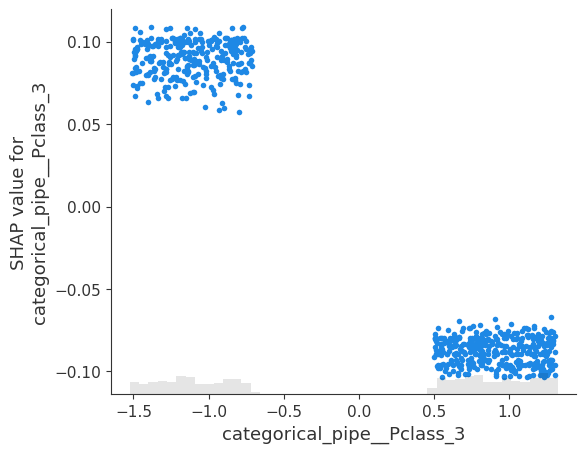

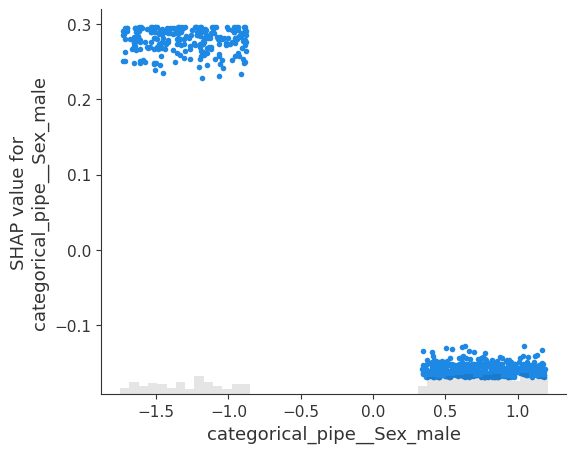

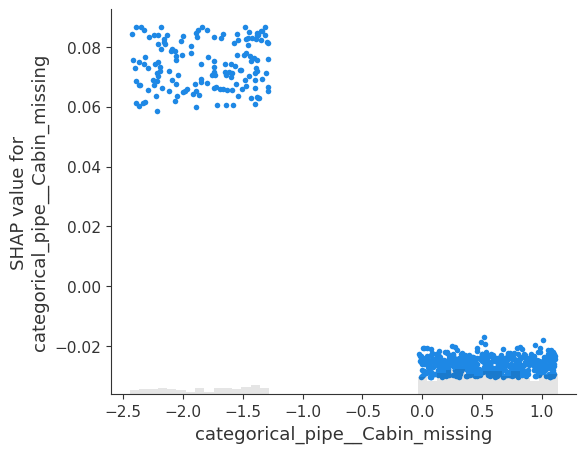

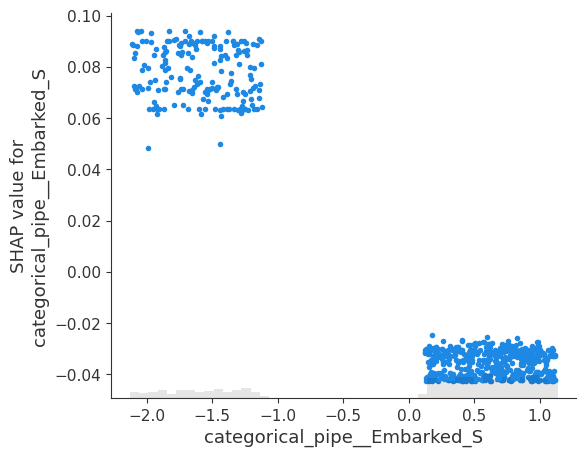

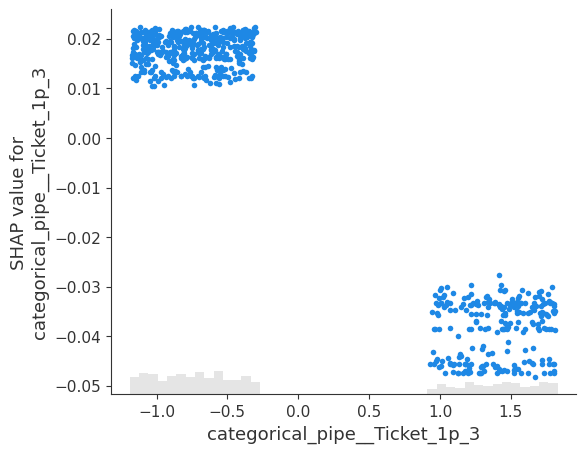

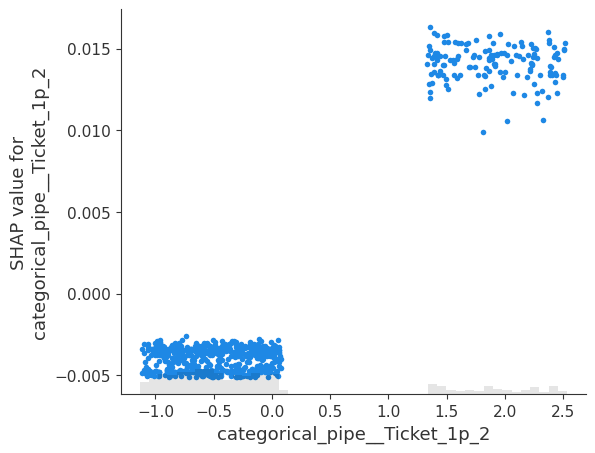

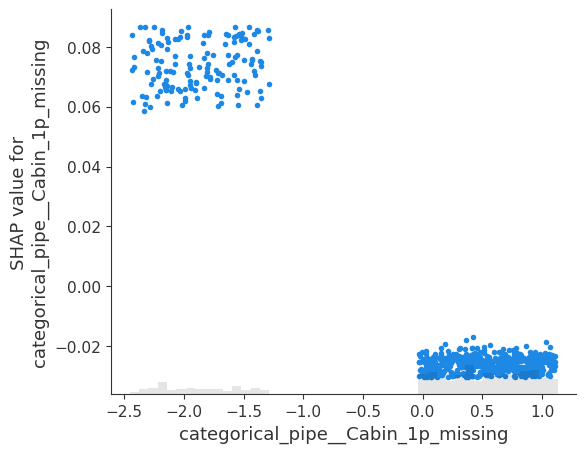

In [19]:
for col in X_val.columns:
    shap.plots.scatter(shap_values_train[:,col,1])